<a href="https://colab.research.google.com/github/juhee3199/SAI-2020-Team-I/blob/master/2%ED%95%99%EA%B8%B0-%EC%BC%80%EB%9D%BC%EC%88%98%EC%9A%94%EC%9D%BC3%EC%8B%9C/%EC%9D%B4%EC%A3%BC%ED%9D%AC/ch5_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 5.1 합성곱 신경망

- MNIST 숫자 이미지 분류에 convnet 사용
- conv2D와 Maxpooling2D 층을 쌓아 올림.

**convnet**
- (image_height,image_width, image_channels_) 크기의 입력 텐서를 사용
- conv2D와 Maxpooling2D 층의 출력은 위와 같은 크기의 3D 텐서이다.
- 높이와 넓이 차원은 네트워크가 깊어질수록 작아진다. 
- 채널의 수는 conv2D 층에 전달된 첫번 째 매개변수에 의해 조절된다. (32 또는 64개)


**model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))**

- (3*3*1)의 필터가 32개.  3*3 = kernel_size
- filter: 이미지에서 특징을 분리해내는 기능. 출력 공간의 차원(깊이)를 결정
- input_shape는 (행, 열, 색상)을 의미. 흑백= 1, RGB= 3. 이경우 28*28행렬의 흑백사진

-->  3×3 크기의 필터가 사용되며, 합성곱 연산이 이루어지고 나면 이미지는 (28, 28) 크기에서 (26, 26)이 된다.

- output_size = (N-F)/stride +1
- (28-3)/1 +1 = 26 


**model.add(layers.MaxPooling2D(2,2))**
- MaxPooling : 정해진 영역 안에서 가장 큰 값만 남기고 나머지는 버리는 방식. 풀링 기법 중 가장 많이 사용함.
- pooling 윈도우 크기는 2*2

--> 2*2 filter를 사용하면 (26, 26) 크기의 이미지는 (13, 13) 크기가 된다.


https://www.notion.so/ch5-computing-vision_CNN-f3ad664413784b7a91e3951113690747

In [9]:
from keras import layers
from keras import models

model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))  #(28,28,1) - MNIST 이미지 포맷
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))

model.summary() #convnet 구조 출력

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 마지막 층의 ((3,3,64)크기의 출력 텐서를 fully connected network에 주입한다.
# 이는 많이 봐왔던  dense층을 쌓은 분류기.

model.add(layers.Flatten()) # 3D출력을 1D텐서로 펼치기.
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax')) #10개의 클래스 분류

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)               

In [20]:
# mnist 이미지에 convnet 훈련하기

from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000,28,28,1))
train_iamges = train_images.astype('float32')/255  # 모든 값을 0과 1 사이로 스케일링

test_images = test_images.reshape((10000,28,28,1))
test_images = test_images.astype('float32')/255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# to_categorical 함수: 훈련 데이터의 개수가 n이고 클래스의 개수가 k일 때, 입력받은 n크기의 1차원 정수 배열을 (n, k) 크기의 2차원 배열로 변경. 
# to_categorical([0, 2])는 [[1, 0, 0], [0, 0, 1]]을 반환합니다. 


model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_iamges, train_labels, epochs=5, batch_size=64)

Epoch 1/5
938/938 [==============================] - 51s 54ms/step - loss: 0.0157 - accuracy: 0.9952
Epoch 2/5
938/938 [==============================] - 52s 55ms/step - loss: 0.0132 - accuracy: 0.9961
Epoch 3/5
938/938 [==============================] - 50s 53ms/step - loss: 0.0110 - accuracy: 0.9967
Epoch 4/5
938/938 [==============================] - 51s 54ms/step - loss: 0.0090 - accuracy: 0.9973
Epoch 5/5
938/938 [==============================] - 51s 54ms/step - loss: 0.0081 - accuracy: 0.9977


In [21]:
# 테스트 데이터에서 모델 평가
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

# 2장 fully connected network에서는 97.8%

313/313 [==============================] - 3s 10ms/step - loss: 0.0536 - accuracy: 0.9897


0.9897000193595886

In [23]:
#### 5.1.2 최대 풀링 연산 
# 최대풀링층을 빼고 합성곱만으로 이루어진 모델

model_no_max_pool=models.Sequential()
model_no_max_pool.add(layers.Conv2D(32,(3,3), activation='relu',
                                   input_shape=(28,28,1)))
model_no_max_pool.add(layers.Conv2D(64,(3,3), activation='relu'))
model_no_max_pool.add(layers.Conv2D(64,(3,3),activation='relu'))

model_no_max_pool.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 22, 22, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


### 5.2 소규모 데이터셋에서 밑바닥부터 컨브넷 훈련하기

In [24]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

Uninstalling kaggle-1.5.9:
  Successfully uninstalled kaggle-1.5.9
     |████████████████████████████████| 1.5MB 2.7MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 1.7 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=811b4f5425ac7f1eb56f995c699fd12bc6f168e989f1c4e01bc0fda62fad1acc
  Stored in directory: /root/.cache/pip/wheels/01/3e/ff/77407ebac3ef71a79b9166a8382aecf88415a0bcbe3c095a01
Successfully built kaggle


In [29]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!ls -lha kaggle.json
!chmod 600 ~/.kaggle/kaggle.json

-rw-r--r-- 1 root root 64 Nov  9 10:32 kaggle.json


In [33]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [34]:
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [92]:
!unzip train.zip

# datasets/cats_and_dogs 파일생성해서 압축 푼 train파일 옮기기

unzip:  cannot find or open train.zip, train.zip.zip or train.zip.ZIP.


In [42]:
!unzip test1.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: test1/55.jpg            
  inflating: test1/550.jpg           
  inflating: test1/5500.jpg          
  inflating: test1/5501.jpg          
  inflating: test1/5502.jpg          
  inflating: test1/5503.jpg          
  inflating: test1/5504.jpg          
  inflating: test1/5505.jpg          
  inflating: test1/5506.jpg          
  inflating: test1/5507.jpg          
  inflating: test1/5508.jpg          
  inflating: test1/5509.jpg          
  inflating: test1/551.jpg           
  inflating: test1/5510.jpg          
  inflating: test1/5511.jpg          
  inflating: test1/5512.jpg          
  inflating: test1/5513.jpg          
  inflating: test1/5514.jpg          
  inflating: test1/5515.jpg          
  inflating: test1/5516.jpg          
  inflating: test1/5517.jpg          
  inflating: test1/5518.jpg          
  inflating: test1/5519.jpg          
  inflating: test1/552.jpg           
  inflating: test1/5520.jpg          
  inflating: t

In [87]:
os.getcwd()

'/content'

In [88]:
os.listdir(os.getcwd())

['.config',
 '.ipynb_checkpoints',
 'test_dir',
 'base_dir',
 'dogs-vs-cats.zip',
 'cats_and_dogs',
 'train_dir',
 'test1.zip',
 'sample_data',
 'train.zip',
 'train',
 'datasets',
 'sampleSubmission.csv',
 'kaggle.json']

In [102]:
original_dataset_dir = './datasets/cats_and_dogs/train'

base_dir = './datasets/cats_and_dogs_small'
if os.path.exists(base_dir):  # 반복적인 실행을 위해 디렉토리를 삭제합니다.
    shutil.rmtree(base_dir)   # 이 코드는 책에 포함되어 있지 않습니다.
os.mkdir(base_dir)


In [103]:
# 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir=os.path.join(base_dir,'train')
os.mkdir(train_dir)
validation_dir=os.path.join(base_dir,'validation')
os.mkdir(validation_dir)
test_dir=os.path.join(base_dir,'test')
os.mkdir(test_dir)

In [104]:
train_cats_dir=os.path.join(train_dir,'cats')
os.mkdir(train_cats_dir)

train_dogs_dir=os.path.join(train_dir,'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir=os.path.join(validation_dir,'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir=os.path.join(validation_dir,'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir=os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir=os.path.join(test_dir,'dogs')
os.mkdir(test_dogs_dir)

In [105]:

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [106]:
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))

print('훈련용 강아지 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))

print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))

print('검증용 강아지 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))

print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))

print('테스트용 강아지 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 강아지 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 강아지 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 강아지 이미지 전체 개수: 500


In [107]:
# 네트워크 구성하기
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [109]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [110]:
#모델 훈련
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

이미지 데이터를 부동소수타입의 텐서로 전처리하기!
- 이를 위해 JPEG 콘텐츠를 -> RGB 픽셀 값으로 디코딩
- 그다음 부동 소수 타입의 텐서로 변환
- 픽셀값 (0~255)사이의 스케일을 [0,1] 사이로 조정

**위 과정을 ImageDataGenerator 클래스를 통해 해결하기**

In [111]:
from keras.preprocessing.image import ImageDataGenerator

# 이미지데이터 스케일링 ([0,1] 사이로)
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'    
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [112]:
# 위의 generator 출력 예시

for data_batch, labels_batch in train_generator:
  print('배치 데이터 크기', data_batch.shape)
  print('배치 레이블 크기', labels_batch.shape)
  break

# (20,150,150,3): 150*150 RGB이미지의 배치 크기와 이진 레이블의 배치((20, 크기))

배치 데이터 크기 (20, 150, 150, 3)
배치 레이블 크기 (20,)


In [114]:
# 배치 제너레이터를 사용해서 모델 훈련

# fit_generator() : fit과 동일 + generator 사용가능
  # train_generator : 위에서 지정한 generator. 입력과 타깃의 배치를 끝없이 반환
  # steps_per_epochs : generator에서 뽑을 샘플. 해당 수 만큼 경사하강법을 실시한 후 다음 에폭으로 넘어감.
  # 여기서는 20개의 샘플이 하나의 배치이기 때문에, 100개의 배치를 뽑아서 2000개의 샘플을 모두 처리한다.

history = model.fit_generator(
    train_generator,                      
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/30
100/100 [==============================] - 105s 1s/step - loss: 0.6895 - acc: 0.5315 - val_loss: 0.6741 - val_acc: 0.5870
Epoch 2/30
100/100 [==============================] - 105s 1s/step - loss: 0.6625 - acc: 0.6065 - val_loss: 0.6484 - val_acc: 0.6070
Epoch 3/30
100/100 [==============================] - 106s 1s/step - loss: 0.6214 - acc: 0.6570 - val_loss: 0.7264 - val_acc: 0.5510
Epoch 4/30
100/100 [==============================] - 105s 1s/step - loss: 0.5816 - acc: 0.7035 - val_loss: 0.5923 - val_acc: 0.6780
Epoch 5/30
100/100 [==============================] - 106s 1s/step - loss: 0.5469 - acc: 0.7035 - val_loss: 0.6602 - val_acc: 0.6260
Epoch 6/30
100/100 [==============================] - 105s 1s/step - loss: 0.5214 - acc: 0.7430 - val_loss: 0.5774 - val_acc: 0.6950
Epoch 7/30
100/100 [==============================] - 105s 1s/step - loss: 0.4824 - acc: 0.7665 - val_loss: 0.5630 - val_acc: 0.7000
Epoch 8/30
100/100 [==============================] - 106s 1s/step - 

In [115]:
# 모델 저장하기
model.save('cats_and_dogs_small_1.h5')

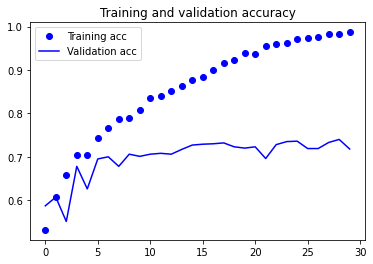

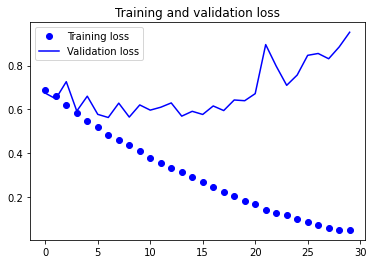

In [116]:
# 훈련의 정확도와 손실 그래프 그리기

import matplotlib.pyplot as plt

# history: 위에서 생성한 generator를 사용해서 훈련시킨 모델

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

#### 5.2.5 데이터 증식 사용하기

- 위에서 과대적합이 발생하였다. 이는 학습할 샘플이 너무 적어서 새로운 데이터에 일반화할 수 있는 모델을 훈련시킬 수 없기 때문이다. 
- 그래서 데이터 증식을 사용한다.
- 데이터 증식: 그럴듯한 이미지를 생성하도록 여러가지 랜덤한 변환을 적용하여 샘플을 늘린다. 
- but 기존 정보의 재조합만 가능. 새로운 정보를 만들어낼 수는 없다.

In [117]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# rotation_range: 랜덤하게 사진을 회전시킬 각도 범위입니다(0-180 사이).
# width_shift_range와 height_shift_range는 사진을 수평과 수직으로 랜덤하게 평행 이동시킬 범위입니다(전체 넓이와 높이에 대한 비율).
# shear_range는 랜덤하게 전단 변환을 적용할 각도 범위입니다.
# zoom_range는 랜덤하게 사진을 확대할 범위입니다.
# horizontal_flip은 랜덤하게 이미지를 수평으로 뒤집습니다. 수평 대칭을 가정할 수 있을 때 사용합니다(예를 들어, 풍경/인물 사진).
# fill_mode는 회전이나 가로/세로 이동으로 인해 새롭게 생성해야 할 픽셀을 채울 전략입니다.


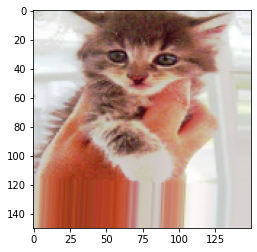

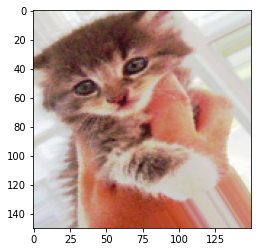

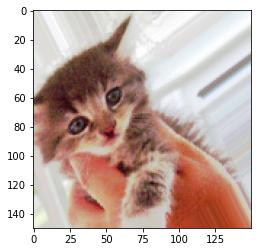

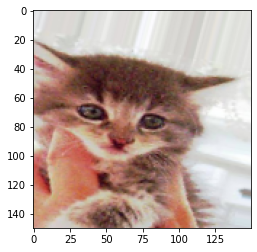

In [118]:
# 이미지 전처리 유틸리티 모듈
from keras.preprocessing import image

fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)])

img_path = fnames[3] # 증식할 이미지 선택

# 이미지를 읽고 크기를 변경
img = image.load_img(img_path, target_size=(150, 150))

# (150, 150, 3) 크기의 넘파이 배열로 변환
x = image.img_to_array(img)

# (1, 150, 150, 3) 크기로 변환
x = x.reshape((1,) + x.shape)

# flow() 메서드는 랜덤하게 변환된 이미지의 배치를 생성
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

In [119]:
# dropout을 포함한 convnet

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [120]:
# 데이터 증식과 드롭아웃을 사용하여 이 네트워크를 훈련시키기

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
  1/100 [..............................] - ETA: 0s - loss: 0.6889 - acc: 0.5000

KeyboardInterrupt: ignored

In [ ]:
# 모델 저장
model.save('cats_and_dogs_small_2.h5')


In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# 5.3 사전 훈련된 convnet 사용

In [121]:
# VGG16 합성곱 기반 층 만들기

from keras.applications import VGG16

conv_base=VGG16(weights='imagenet',  # 초기화할 가중치 체크포인트를 지정
                include_top=False, # 최상위 fully connected를 포함할지 여부. 기본값은 포함.
                input_shape=(150,150,3))

58892288/58889256 [==============================] - 0s 0us/step


In [122]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     